# Prevendo Notas do ENEM

O objetivo dessa análise é desenvolver um modelo que seja capaz de prever a nota no ENEM de um participante, baseado em dados socioeconômicos sobre ele.
<br><br>
O objetivo é que, a partir dessas previsões, a gente consiga analisar quais variáveis possuem maior impacto na previsão, o que pode ajudar a avaliar a necessidade do sistema de cotas.
<br><br>
Iremos julgar como injustiça um parâmetro que supostamente não deveria ser relevante para decidir a nota do participante, mas que o modelo julgou como relevante.

## Baixando dados

Os dados originais do ENEM 2022 já foram tratados para o modelo em "dataset_para_modelo.iypnb".

In [13]:
# Bibliotecas importantes
import pandas as pd
import numpy as np
import seaborn as sns

In [14]:
df = pd.read_csv("microdados_tratado.csv")

In [15]:
# Número de inscrição era necessário apenas para juntar dados
df.drop("NU_INSCRICAO", axis=1, inplace=True)

## Feature Scaling e Train/Test Split

In [16]:
# Fazendo MinMaxScaling para garantir que todas as variáveis estão na mesma escala
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_x = df.drop("NOTA_TOTAL", axis=1)
df_y = df["NOTA_TOTAL"]
df_x = pd.DataFrame(data=scaler.fit_transform(df_x), columns=df_x.columns)
df = df_x.join(df_y)
df

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,TP_ENSINO,FAIXA_SALARIAL,NACIONALIDADE_1.0,NACIONALIDADE_2.0,NACIONALIDADE_3.0,NACIONALIDADE_4.0,Centro-Oeste,Nordeste,Norte,Sudeste,Sul,NOTA_TOTAL
0,0.210526,0.0,0.5,1.0,0.0,0.0625,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,471.94
1,0.105263,0.0,0.0,1.0,0.0,0.2500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,793.54
2,0.052632,1.0,0.5,1.0,0.0,0.3125,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,579.24
3,0.105263,0.0,0.5,1.0,1.0,0.0625,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,469.96
4,0.105263,1.0,0.0,1.0,0.0,0.1875,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,489.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669776,0.157895,1.0,0.5,1.0,0.0,0.0625,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,439.66
669777,0.052632,1.0,0.0,1.0,0.0,0.3125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,526.38
669778,0.105263,0.0,0.0,1.0,0.0,0.3125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,515.02
669779,0.052632,1.0,0.5,1.0,0.0,0.0625,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,541.22


<Axes: xlabel='NOTA_TOTAL', ylabel='Count'>

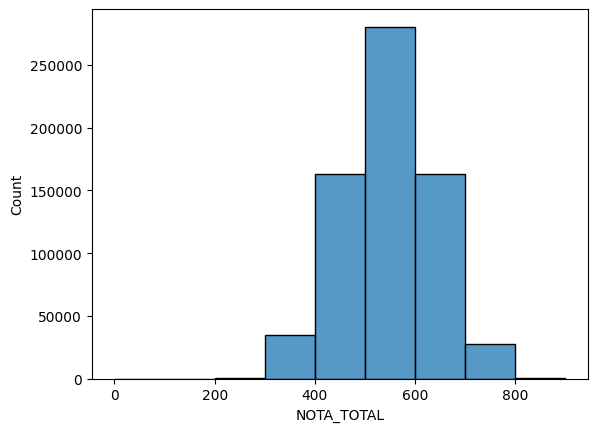

In [17]:
# Proporção das notas
import seaborn as sns
sns.histplot(x=df["NOTA_TOTAL"], binwidth=100)

In [18]:
# Para garantir que os datasets de treino e teste sigam essa proporção, é interessante criar um parâmetro auxiliar
# O parâmetro irá controlar em qual faixa a nota se encontra (0-100, 100-200, ...)
from math import floor
faixa = 100
auxiliar = np.floor(df["NOTA_TOTAL"] / faixa).astype(int)
auxiliar

0         4
1         7
2         5
3         4
4         4
         ..
669776    4
669777    5
669778    5
669779    5
669780    6
Name: NOTA_TOTAL, Length: 669781, dtype: int64

In [19]:
# Fazendo split de treino/teste
from sklearn.model_selection import train_test_split
X = df.drop("NOTA_TOTAL", axis=1)
Y = df["NOTA_TOTAL"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, stratify=auxiliar)

<Axes: xlabel='NOTA_TOTAL', ylabel='Count'>

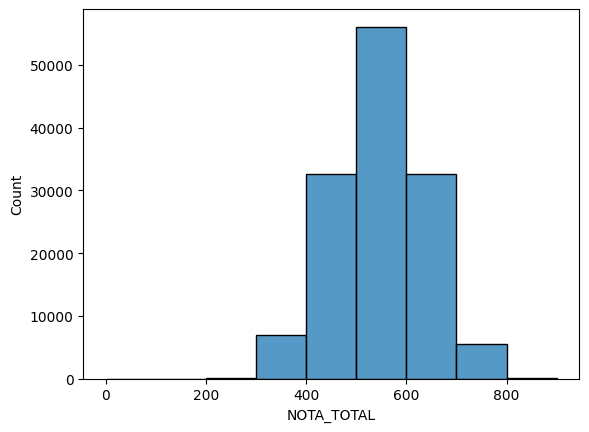

In [20]:
# Teste
import seaborn as sns
sns.histplot(x=y_test, binwidth=100)

<Axes: xlabel='NOTA_TOTAL', ylabel='Count'>

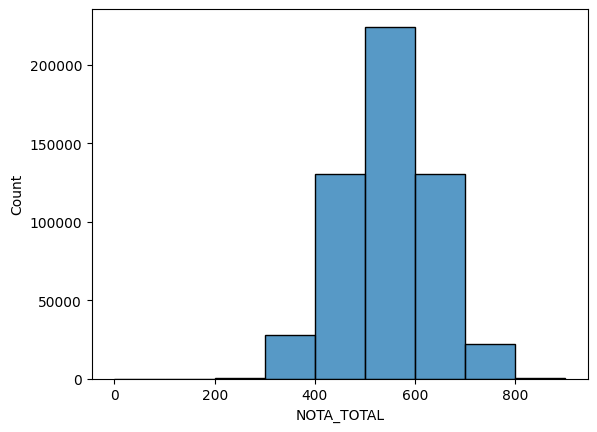

In [21]:
# Treino
import seaborn as sns
sns.histplot(x=y_train, binwidth=100)

## Testando modelo de Regressão Linear

### Desempenho do modelo nos dados de treino

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.29527982220598814

O baixo score é de certa forma uma notícia boa. Isso significa que saber apenas saber sobre a situação socioeconômica do participante não é o suficiente para prever se o candidato foi bem ou não na prova do ENEM. Portanto, isso trás evidências de que o ENEM de fato está testando a inteligência do candidato.<br><br>
Entretanto, só porque o modelo de Regressão Linear não teve um bom desempenho, não quer dizer que outros modelos também não terão. 

### Variáveis relevantes

In [23]:
for feature, coef in zip(X.columns, reg.coef_):
    print(f"{feature}: {coef}")

TP_FAIXA_ETARIA: -192.14191675274097
TP_SEXO: 0.32997853938572064
TP_COR_RACA: -34.34398368917156
TP_ESCOLA: -42.26095137251908
TP_ENSINO: -22.164632089468103
FAIXA_SALARIAL: 110.15501566652968
NACIONALIDADE_1.0: 13248247702136.238
NACIONALIDADE_2.0: 13248247702117.393
NACIONALIDADE_3.0: 13248247702118.676
NACIONALIDADE_4.0: 13248247702147.717
Centro-Oeste: 401379598891079.44
Nordeste: 401379598891082.06
Norte: 401379598891072.6
Sudeste: 401379598891092.06
Sul: 401379598891084.7


## Testando modelo de RandomForest

### Desempenho do modelo nos dados de treino

In [24]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor().fit(X_train, y_train)
regr.score(X_test, y_test)

0.30861755377590316

Assim como no modelo de regressão linear, o RandomForest também teve um baixo desepenho, trazendo mais evidências de que as variáveis socioeconômicas sozinhas não são capazes de prever o desepenho do aluno no ENEM.

### Variáveis Relevantes

In [25]:
for feature, importance in zip(X.columns, regr.feature_importances_):
    print(f"{feature}: {importance}")

TP_FAIXA_ETARIA: 0.053619136488946804
TP_SEXO: 0.010992686889649576
TP_COR_RACA: 0.04040625691778253
TP_ESCOLA: 0.5395004912435147
TP_ENSINO: 0.003240974766834446
FAIXA_SALARIAL: 0.31220259016121243
NACIONALIDADE_1.0: 0.00317371255470565
NACIONALIDADE_2.0: 0.00409345292970668
NACIONALIDADE_3.0: 0.0016046522478905425
NACIONALIDADE_4.0: 0.002011311653161939
Centro-Oeste: 0.004209528156352641
Nordeste: 0.006715117291869613
Norte: 0.004657938472723553
Sudeste: 0.009133372215116101
Sul: 0.004438778010532812


Note que esse modelo julgou que o tipo de escola (pública ou privada) teve uma importância de 54%, e a faixa salarial teve uma importância de 31%.
<br><br>
Considerando que, se todos os parâmetros tivessem a mesma importância, eles teriam em média 100/15 = 6,67% de importância, esses valores são altos.
<br><br>
Assim, pelo menos nesse modelo, podemos dizer que há de fato certa injustiça quanto à situação social (se estudou em escola pública ou não, e qual faixa salarial).
<br><br>
Por outro lado, a cor que o candidato se identifica e sua nacionalidade parecem ter pouca relevância, o que pode indicar que há pouca injustiça nesses casos.